In [1]:
import pandas as pd
import csv
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df0 = pd.read_csv('sentencing/sentencing000000000000.csv')

In [5]:
df1 = pd.read_csv('sentencing/sentencing000000000001.csv')

In [7]:
df2 = pd.read_csv('sentencing/sentencing000000000002.csv')

In [8]:
df = pd.concat([df0, df1, df2])

In [9]:
# Remove 1 invalid row
df = df[df['race']!='RACE']

In [49]:
df.head()

,sentdte,dornum,prepby,prepnm,county,judge,lstnm,fstnm,dob,obts,...,cglgsrs2,cglgsrs3,cglgsrs4,cglgsrs5,cgmsrsn1,cgmsrsn2,cgmsrsn3,cgprmod,cgprsanc,cgprdivr
0,16NOV2009,189613,SAO,UNK,BROWARD,TOWBIN-SINGER,HAMPTON,DEMETRIUS,28MAY1975,NaN,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,N,N,NaN
1,25OCT2010,U03835,SAO,OLS,LAKE,HILL,DIXON,ANWAR,03MAY1970,3501113652.0,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,N,N,N
2,11SEP2007,543508,SAO,STA,SUWANNEE,FINA,GIBBONS,ANDREW,13APR1971,NaN,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,NaN,NaN,NaN
3,14MAY2009,U12528,SAO,BAS,MARION,POPE,BROWN,MITCHELL,26AUG1982,NaN,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,N,NaN,NaN
4,09AUG2011,H38160,SAO,PAT,POLK,"JONES,ERNIE",DEWEY,CHRISTOPHER,15SEP1992,NaN,...,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,MISSING,N,N,N


In [50]:
# Dataset length
len(df)

1354399

In [52]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354399 entries, 0 to 451112
Data columns (total 290 columns):
 #    Column    Dtype 
---   ------    ----- 
 0    sentdte   object
 1    dornum    object
 2    prepby    object
 3    prepnm    object
 4    county    object
 5    judge     object
 6    lstnm     object
 7    fstnm     object
 8    dob       object
 9    obts      object
 10   race      object
 11   hispan    object
 12   gender    object
 13   dispos    object
 14   revoke    object
 15   offqlf    object
 16   docket    object
 17   clfely    object
 18   statut    object
 19   prioff    object
 20   offlvl    object
 21   offdte    object
 22   profpt    object
 23   aosupt    object
 24   aotopt    object
 25   aotopw    object
 26   vi2mrd    object
 27   vi2mrp    object
 28   vidth     object
 29   vidthp    object
 30   visvr     object
 31   visvrp    object
 32   vimod     object
 33   vimodp    object
 34   vislgh    object
 35   vislgp    object
 36   visexp 

In [95]:
# Number of unique offenders
df['dornum'].describe()

count     1354399
unique     738802
top        R33175
freq           21
Name: dornum, dtype: object

### Dataset Date Range

In [123]:
# Date Range
print(df['sentdte'].min())
print(df['sentdte'].max())

01APR2004
31OCT2015


In [10]:
# Get year of sentence date
df['sentdte_yr'] = df['sentdte'].str[-4:]

In [130]:
# Number of rows per sentence year
print(df.groupby('sentdte_yr').size())

sentdte_yr
2004    113668
2005    114005
2006    124882
2007    128007
2008    119717
2009    113115
2010    104437
2011    101358
2012    104245
2013    100483
2014    103720
2015     99952
2016     26810
dtype: int64


### Create Total Prison Sentence Variable

In [11]:
# Convert prison sentence year/month/date columns to numeric
df['spyrs'] = pd.to_numeric(df['spyrs'])
df['spmths'] = pd.to_numeric(df['spmths'])
df['spdays'] = pd.to_numeric(df['spdays'])

In [12]:
# Create column for total prison sentence in days
df['sp_total_days'] = (df['spyrs']*365) + (df['spmths']*30) + df['spdays']
df['sp_total_days'] = pd.to_numeric(df['sp_total_days'])

In [113]:
df['sp_total_days'].describe()

count    1.354399e+06
mean     2.378872e+03
std      8.492234e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.660000e+02
max      3.680604e+06
Name: sp_total_days, dtype: float64

### Race

In [25]:
# Race values
df['race'].value_counts(ascending=False)

WHITE    809925
BLACK    516664
OTHER     27810
Name: race, dtype: int64

Text(0.5, 1.0, 'Race')

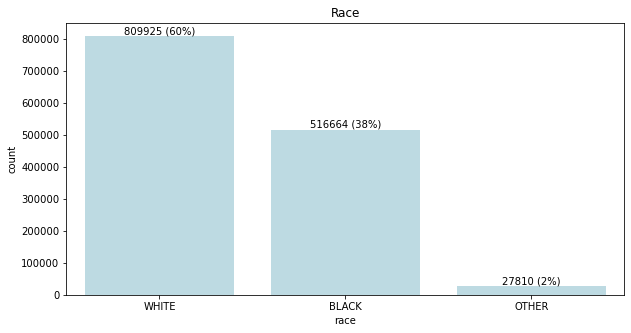

In [31]:
# Race values - barplot
fig, axes = plt.subplots(1, 1, figsize=(10,5))
ax = sb.countplot(x=df['race'], palette = ['#b7dee8'], order=df['race'].value_counts(ascending=False).index)

abs_values = df['race'].value_counts(ascending=False)
rel_values = df['race'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Race')

### Gender

In [119]:
# Gender values
df['gender'].value_counts()

MALE      1070471
FEMALE     283928
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

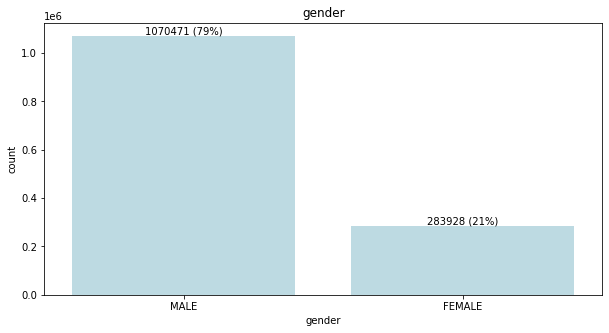

In [32]:
# Gender values - barplot
fig, axes = plt.subplots(1, 1, figsize=(10,5))
ax = sb.countplot(x=df['gender'], palette = ['#b7dee8'], order=df['gender'].value_counts(ascending=False).index)

abs_values = df['gender'].value_counts(ascending=False)
rel_values = df['gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('gender')

### Offense Level

In [132]:
# Offence level
df['offlvl'].value_counts()

3RD LEVEL     343071
5TH LEVEL     202502
1ST LEVEL     177654
4TH LEVEL     175176
2ND LEVEL     150375
6TH LEVEL     124305
7TH LEVEL     119456
8TH LEVEL      30006
9TH LEVEL      25779
10TH LEVEL      6060
1                  8
98                 7
Name: offlvl, dtype: int64

Text(0.5, 1.0, 'Offense Level')

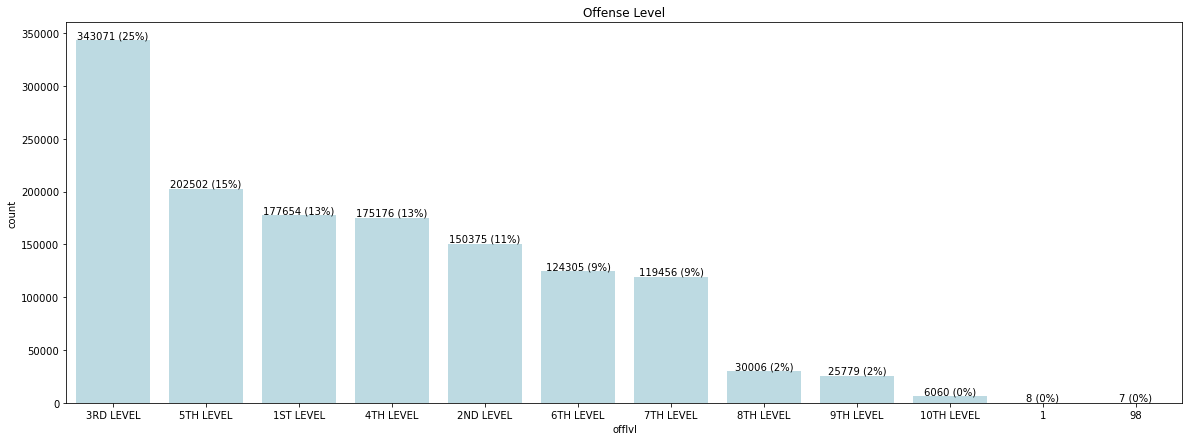

In [35]:
# Offense level values - barplot
fig, axes = plt.subplots(1, 1, figsize=(20,7))
ax = sb.countplot(x=df['offlvl'], palette = ['#b7dee8'], order=df['offlvl'].value_counts(ascending=False).index)

abs_values = df['offlvl'].value_counts(ascending=False)
rel_values = df['offlvl'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title('Offense Level')

### Total Points & Prison Sentence Length by Race

<AxesSubplot:xlabel='totpts', ylabel='sp_total_days'>

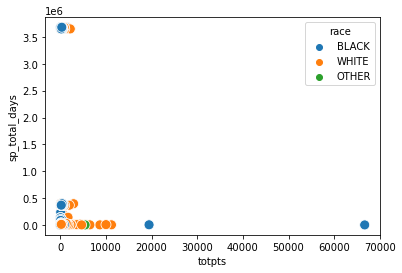

In [16]:
sb.scatterplot(x='totpts', y='sp_total_days', hue='race', s=100, data=df)

### Setence by Offense Level and Race

In [67]:
# Mean Prison Sentence by Offense Level and Race
df_level_race = df.groupby(['offlvl', 'race'])['sp_total_days'].mean().unstack().reset_index()
df_level_race = df_level_race[~df_level_race['offlvl'].isin(['1','98'])]

In [68]:
df_level_race

race,offlvl,BLACK,OTHER,WHITE
1,10TH LEVEL,186747.095615,135236.357977,150487.721318
2,1ST LEVEL,87.722984,46.845119,64.970955
3,2ND LEVEL,101.546432,61.238542,85.779400
4,3RD LEVEL,112.071670,69.987703,66.568502
5,4TH LEVEL,285.315677,173.587145,190.888214
6,5TH LEVEL,575.728485,255.123745,306.931188
7,6TH LEVEL,658.004502,395.446119,469.249123
8,7TH LEVEL,1871.068549,1002.154450,1323.519697
9,8TH LEVEL,18705.812687,9429.460348,8404.521661
11,9TH LEVEL,60577.121714,51316.771400,46449.346878


<AxesSubplot:xlabel='offlvl'>

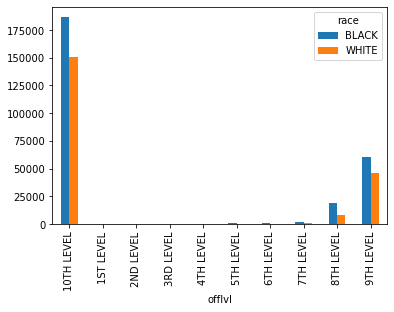

In [71]:
df_level_race.plot.bar(x = 'offlvl', y = ['BLACK', 'WHITE'])